# Laboratorio 2
Andrea Cecilia Rivas Castañeda - 16001120

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import statistics
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import normalize, MinMaxScaler

# Cargamos el Dataset

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

### Eliminar la columna PassengerId

In [4]:
data.drop('PassengerId', axis = 1, inplace=True)

In [5]:
data.shape

(891, 11)

# Análisis de Datos

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


* Se observan 6 variables numericas
* Se observan 5 variables categoricas

In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Análisis de datos faltantes

In [8]:
data.isnull().mean().sort_values(ascending=False)

Cabin       0.771044
Age         0.198653
Embarked    0.002245
Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
dtype: float64

In [9]:
var_with_na = [var for var in data.columns if(data[var].isnull().sum()>0)]
var_with_na

['Age', 'Cabin', 'Embarked']

In [10]:
data[var_with_na].dtypes

Age         float64
Cabin        object
Embarked     object
dtype: object

In [11]:
data.groupby('Survived').count().rsub(data.groupby('Survived').size(), axis=0)[var_with_na]

,Age,Cabin,Embarked
Survived,,,
0,125,481,0
1,52,206,2


* Age: de los 177 missing values, 125 no sobrevivieron y 52 si.
* Cabin: de los 687 missing values, 481 no sobrevivieron y 206 si.
* Embarked: de lo 2 missing values, 2 sobrevivieron.

In [12]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
data[['Survived', 'Age']].groupby('Survived').mean()

,Age
Survived,
0,30.626179
1,28.343690


In [14]:
df = data.copy()
var = 'Age'
df['AgeNa'] = np.where(df[var].isnull(), 'Si', 'No')
temp = df.groupby('AgeNa').Survived.agg(['mean', 'std', 'count'])
temp

,mean,std,count
AgeNa,,,
No,0.406162,0.491460,714
Si,0.293785,0.456787,177


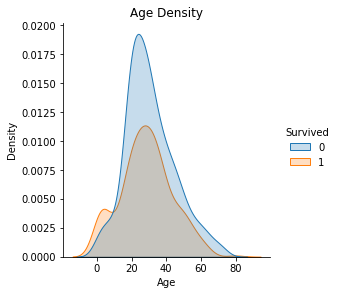

In [15]:
sns.displot(data=df, x="Age", hue="Survived", kind="kde", fill=True, height=4)
plt.title('Age Density')
plt.show()

In [16]:
data.Cabin.describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [17]:
data.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
C54            1
C99            1
A10            1
C106           1
B41            1
Name: Cabin, Length: 147, dtype: int64

In [18]:
data.groupby('Survived')['Cabin'].value_counts()

Survived  Cabin      
0         C124           2
          C22 C26        2
          C23 C25 C27    2
          D26            2
          F G73          2
                        ..
1         E49            1
          E50            1
          E67            1
          E68            1
          F E69          1
Name: Cabin, Length: 163, dtype: int64

In [19]:
statistics.mode(df.Cabin), statistics.mode(df.Cabin.dropna())

(nan, 'G6')

In [20]:
data.drop('Cabin', axis = 1, inplace=True)

* Se recomienda no tomar en cuenta la variable *Cabin*, ya que el 77% de los datos son Nas

### Variable Embarked
* Port of Embarkation

In [21]:
data.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [22]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
data.groupby('Survived')['Embarked'].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64

In [24]:
data.groupby('Survived').count().rsub(data.groupby('Survived').size(), axis=0)['Embarked']

Survived
0    0
1    2
Name: Embarked, dtype: int64

In [25]:
data['Embarked'] = data['Embarked'].fillna('S')

* Se seleccionó el valor 'S' ya que se tiene la probabilidad más alta de pertenecer a ese grupo. 

## Transformación de Vars. Categóricas

In [26]:
data.isna().mean()

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Embarked    0.000000
dtype: float64

In [27]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
cat_vars

['Name', 'Sex', 'Ticket', 'Embarked']

### Variable *Name*

In [28]:
data['Name'].value_counts()

Goodwin, Miss. Lillian Amy                       1
Carter, Mrs. Ernest Courtenay (Lilian Hughes)    1
Bourke, Mrs. John (Catherine)                    1
Fry, Mr. Richard                                 1
Smith, Mr. Thomas                                1
                                                ..
Reuchlin, Jonkheer. John George                  1
Woolner, Mr. Hugh                                1
Burns, Miss. Elizabeth Margaret                  1
Petroff, Mr. Nedelio                             1
Carter, Mrs. William Ernest (Lucile Polk)        1
Name: Name, Length: 891, dtype: int64

* Se recomienda eliminar esta columna.

In [29]:
data.drop('Name', axis = 1, inplace=True)

### Variable *Sex*

In [30]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [31]:
data.Sex = data['Sex'].replace('male', 0)
data.Sex = data['Sex'].replace('female', 1)
data['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

### Variable *Ticket*

In [32]:
enc_ticket = data['Ticket'].value_counts()/data.shape[0]
enc_ticket

CA. 2343       0.007856
347082         0.007856
1601           0.007856
3101295        0.006734
CA 2144        0.006734
                 ...   
36209          0.001122
347063         0.001122
4136           0.001122
W./C. 14258    0.001122
345778         0.001122
Name: Ticket, Length: 681, dtype: float64

In [33]:
data.Ticket = data['Ticket'].apply(lambda x : enc_ticket[x])

* Se seleccionó frequency encoding

### Variable *Embarked*

In [34]:
enc_embarked = {'S': 0, 'C': 1, 'Q': 2}#data.Embarked.value_counts().to_dict()
enc_embarked

{'S': 0, 'C': 1, 'Q': 2}

In [35]:
data.Embarked = data['Embarked'].apply(lambda x : enc_embarked[x])

In [36]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,22.0,1,0,0.001122,7.2500,0
1,1,1,1,38.0,1,0,0.001122,71.2833,1
2,1,3,1,26.0,0,0,0.001122,7.9250,0
3,1,1,1,35.0,1,0,0.002245,53.1000,0
4,0,3,0,35.0,0,0,0.001122,8.0500,0


# Variables Numericas

In [37]:
num_vars = [var for var in data.columns if(var not in cat_vars and var != 'Survived')]
num_vars

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

## Vars. Discretas

In [38]:
discrete_vars = [var for var in num_vars if((len(data[var].unique()) < 20))]
discrete_vars

['Pclass', 'SibSp', 'Parch']

In [39]:
# Función para graficar el texto en las gráficas de barras
def text_stacked(ax):
    for bar in ax.patches:
        height = bar.get_height()
        width = bar.get_width()
        x = bar.get_x()
        y = bar.get_y()
        label_text = height
        label_x = x + width / 2
        label_y = y + height / 2
        ax.text(label_x, label_y, label_text, ha='center',    va='center')

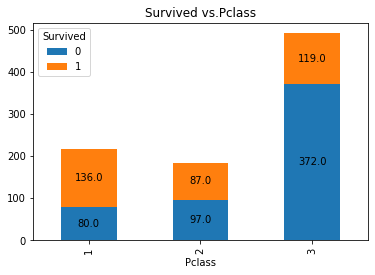

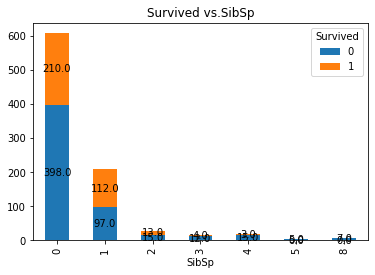

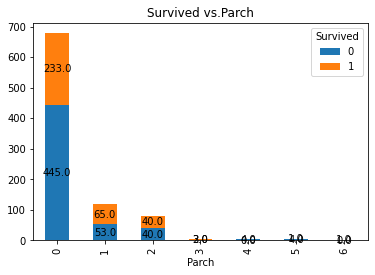

In [40]:
for var in discrete_vars:
    df_stack = df.groupby([var, 'Survived']).size().reset_index().pivot(columns='Survived', index=var, values=0)
    ax = df_stack.plot(kind='bar', stacked=True)
    text_stacked(ax)
    plt.title('Survived vs.' + str(var))
    plt.show()

* Logramos observar que para la variables *SibSp y Parch* la variable *0* contiene la mayoria de los registros a comparación del resto, por lo que se recomienda convertir las variables en 0 y 1, siendo 1 el conjunto del resto de variables.

## Vars. Continuas

In [41]:
cont_vars = [var for var in num_vars if var not in discrete_vars]
cont_vars

['Age', 'Fare']

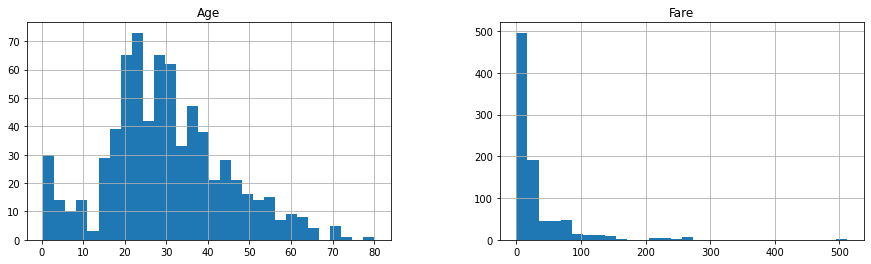

In [42]:
data[cont_vars].hist(bins=30, figsize=(15, 4))
plt.show()

In [43]:
import scipy.stats as stats

### Transformaciones
#### Neo_Johnson

In [44]:
temp_yj = data.copy()

In [45]:
for var in cont_vars:
    temp_yj[var], param = stats.yeojohnson(data[var])

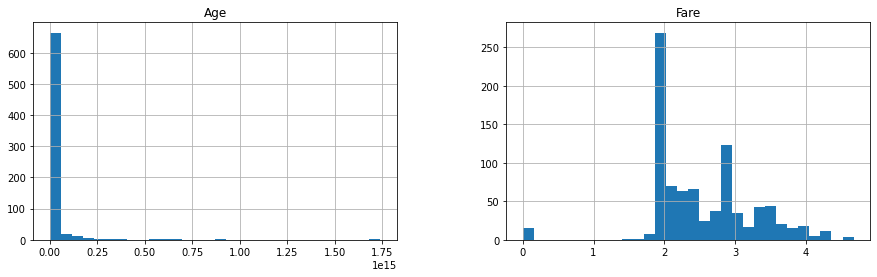

In [46]:
temp_yj[cont_vars].hist(bins=30, figsize=(15, 4))
plt.show()

#### Transformación Log

In [47]:
temp_log = data.copy()

for var in cont_vars:
    temp_log[var] = np.log(temp_log[var] + 1)

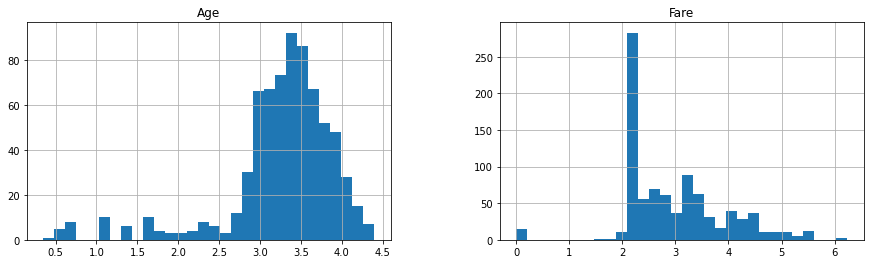

In [48]:
temp_log[cont_vars].hist(bins=30, figsize=(15,4))
plt.show()

#### Transformación de Raíz

In [49]:
temp_sqrt = data.copy()
for var in cont_vars:
    temp_sqrt[var] = np.sqrt(temp_sqrt[var])

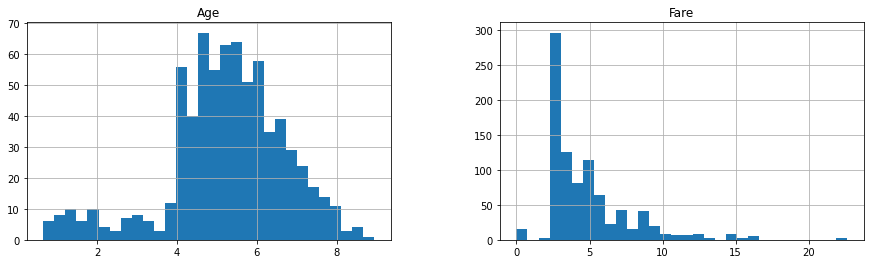

In [50]:
temp_sqrt[cont_vars].hist(bins=30, figsize=(15,4))
plt.show()

#### Transformación de Inverso

In [51]:
temp_divx = data.copy()
for var in cont_vars:
    temp_divx[var] = 1/(temp_divx[var]+1)

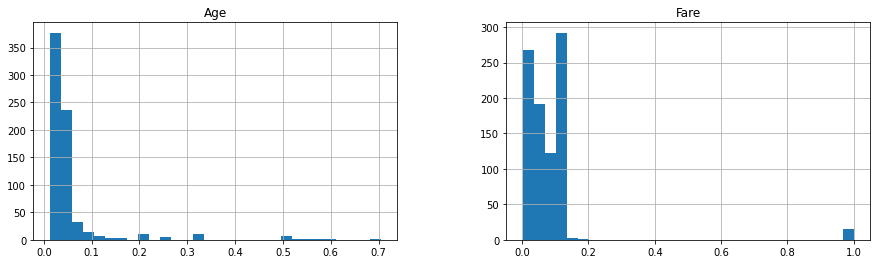

In [52]:
temp_divx[cont_vars].hist(bins=30, figsize=(15,4))
plt.show()

#### Transformación: elevado al cuadrado

In [53]:
temp_pow2 = data.copy()
for var in cont_vars:
    temp_pow2[var] = (temp_pow2[var]**2)

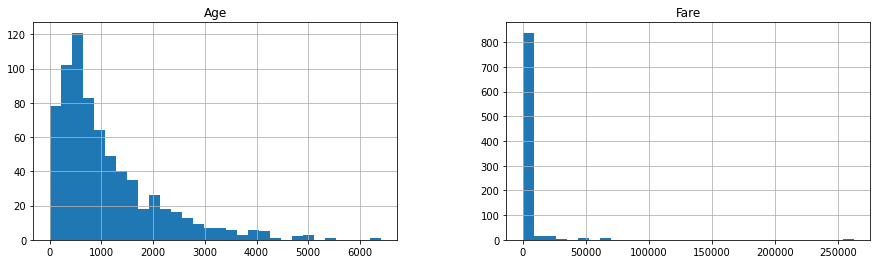

In [54]:
temp_pow2[cont_vars].hist(bins=30, figsize=(15,4))
plt.show()

## Selección de Transformaciones
* Age: para la variable *Age* seleccionamos la transformación Neo-Johnson
* Fare: para la variable *Fare* seleccionamos la transformación por logaritmo

In [55]:
data.Age = temp_yj.Age
data.Fare = temp_log.Fare

In [56]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,4.062097e+10,1,0,0.001122,2.110213,0
1,1,1,1,3.562235e+12,1,0,0.001122,4.280593,1
2,1,3,1,1.580212e+11,0,0,0.001122,2.188856,0
3,1,1,1,1.808062e+12,1,0,0.002245,3.990834,0
4,0,3,0,1.808062e+12,0,0,0.001122,2.202765,0


# Sustitución de NA's

In [57]:
df = data.copy()
# Age
# Sustitución por media
values = df['Survived'].eq(0).map({False: 28, True: 31})
df['Age_mean'] = df['Age'].fillna(values)
# Sustitución por mediana
df['Age_median'] = df['Age'].fillna(28)
# Sustitución por moda
df['Age_mode'] = df['Age'].fillna(statistics.mode(df.Age))
# Sustitución por 0
df['Age_0'] = df['Age'].fillna(0)
# Sustitución por 110
df['Age_110'] = df['Age'].fillna(100)
# Sustitución por valores random
df['Age_random'] = df['Age'].fillna(random.randint(16,50))
# Sustitución por KNN
imputer = KNNImputer(n_neighbors=2, weights="uniform")
knn_Imp = imputer.fit_transform(np.array(df.Age).reshape(-1, 1))
df['Age_KNN'] = knn_Imp

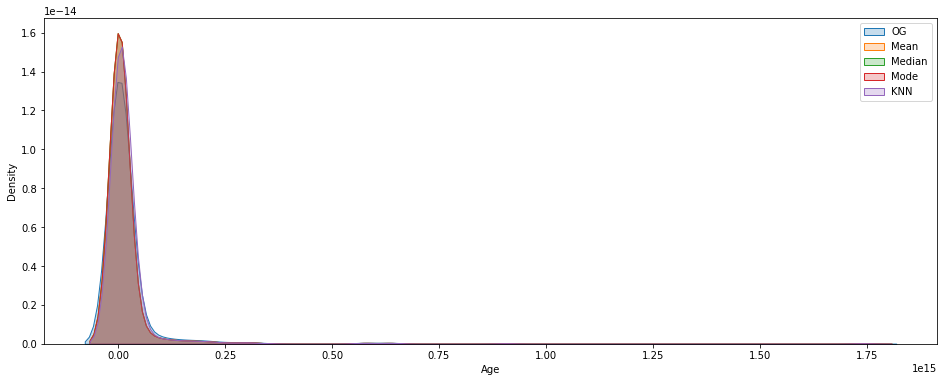

In [58]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
sns.set_palette("Set2")
sns.kdeplot(df['Age'], shade=True, label='OG')
sns.kdeplot(df['Age_mean'], shade=True, label='Mean')
sns.kdeplot(df['Age_median'], shade=True, label='Median')
sns.kdeplot(df['Age_mode'], shade=True, label='Mode')
sns.kdeplot(df['Age_KNN'], shade=True, label='KNN')
plt.legend()
plt.show()